In [4]:
from ultralytics import YOLO
import cv2

In [5]:
model = YOLO('try/sub/best.pt')  

In [6]:
image = cv2.imread('AG_001.jpg')
results = model(image)
result = results[0].boxes


0: 1024x736 1 schueler_klasse, 1 ag_auswahl_wahl_1, 2 ag_auswahl_wahl_2s, 2 ag_auswahl_wahl_3s, 1 ag_schueler_unterschrift, 1 ag_schueler_datum, 1 schueler_name, 1 schueler_vorname, 31.1ms
Speed: 5.4ms preprocess, 31.1ms inference, 8480.1ms postprocess per image at shape (1, 3, 1024, 736)


In [7]:
classes = result.cls
confidences = result.conf
boxes = result.xywh
mapped_classes = [model.names[int(cls)] for cls in classes]

In [24]:
mapped_classes

['schueler_klasse',
 'schueler_name',
 'schueler_vorname',
 'ag_auswahl_wahl_1',
 'ag_auswahl_wahl_2',
 'ag_schueler_datum',
 'ag_schueler_unterschrift',
 'ag_auswahl_wahl_2',
 'ag_auswahl_wahl_3',
 'ag_auswahl_wahl_3']

In [21]:
a = float(confidences[1].cpu())

In [22]:
print(a)

0.902825653553009


In [127]:
print(mapped_classes)

['schueler_klasse', 'schueler_name', 'schueler_vorname', 'ag_auswahl_wahl_1', 'ag_auswahl_wahl_2', 'ag_schueler_datum', 'ag_schueler_unterschrift', 'ag_auswahl_wahl_2', 'ag_auswahl_wahl_3', 'ag_auswahl_wahl_3']


In [128]:
cropped_images = []
for i in range(len(classes)):
    x, y, w, h = boxes[i]
    x1, y1, x2, y2 = int(x - w/2), int(y - h/2), int(x + w/2), int(y + h/2)
    cropped_images.append(image[y1:y2, x1:x2])

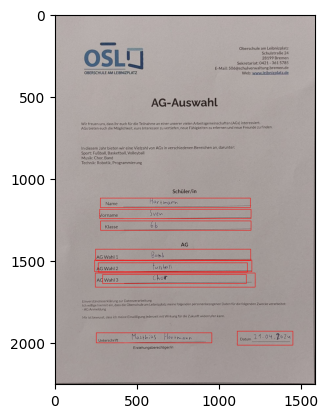

In [129]:
#Plot bounding boxes on original image
copy_image = image.copy()
for i in range(len(classes)):
    x, y, w, h = boxes[i]
    x1, y1, x2, y2 = int(x - w/2), int(y - h/2), int(x + w/2), int(y + h/2)
    cv2.rectangle(copy_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
import matplotlib.pyplot as plt
image_rgb = cv2.cvtColor(copy_image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

In [149]:
cropping_params = {
    "ad_erzieher_name":         {"left": 0.15, "bottom": 0},
    "ad_erzieher_vorname":      {"left": 0.15, "bottom": 0},
    "ad_erzieher_tel":          {"left": 0.2, "bottom": 0},
    "ad_erzieher_email":        {"left": 0.15, "bottom": 0},
    "schueler_name":            {"left": 0.15, "bottom": 0},
    "schueler_vorname":         {"left": 0.15, "bottom": 0},
    "schueler_klasse":          {"left": 0.125, "bottom": 0},
    "ad_neue_ad_str_haus_nr":   {"left": 0.275, "bottom": 0},
    "ad_neue_ad_plz":           {"left": 0.25, "bottom": 0},
    "ad_neue_ad_stadt":         {"left": 0.15, "bottom": 0},
    "ad_schueler_datum":        {"left": 0.2, "bottom": 0},
    "ag_auswahl_wahl_1":        {"left": 0.15, "bottom": 0},
    "ag_auswahl_wahl_2":        {"left": 0.15, "bottom": 0},
    "ag_auswahl_wahl_3":        {"left": 0.15, "bottom": 0},
    "ag_schueler_datum":        {"left": 0.3, "bottom": 0},
    "ad_schueler_unterschrift": {"left": 0.2, "bottom": 0}, 
    "ag_schueler_unterschrift": {"left": 0.2, "bottom": 0}, 
}

In [150]:
def crop(x1, y1, x2, y2, image, crop_left_percent, crop_bottom_percent):
    crop_left = int(crop_left_percent * (x2 - x1))
    crop_bottom = int(crop_bottom_percent * (y2 - y1))
    cropped_image = image[y1 + crop_bottom:y2, x1 + crop_left:x2]
    #print(cropped_image.shape)
    if cropped_image.size == 0:
        print("Cropped image is empty")
        return None
    return cropped_image

In [151]:
import numpy as np

In [152]:
crop_cropped_images = []
for box, map_class in zip(boxes, mapped_classes):
    box = box.cpu()
    x, y, w, h = np.array(box)
    x1, y1, x2, y2 = int(x - w/2), int(y - h/2), int(x + w/2), int(y + h/2)

    crop_left_percent = 0
    crop_bottom_percent = 0
    if map_class in cropping_params:
        #print(map_class, cropping_params[map_class])
        params = cropping_params[map_class]
        crop_left_percent = float(params["left"])
        crop_bottom_percent = float(params["bottom"])
    else:
        continue

    imgCropped = crop(x1, y1, x2, y2, image, crop_left_percent, crop_bottom_percent)
    crop_cropped_images.append(imgCropped)



In [153]:
from inference_smartapp import handwriting_model

In [154]:
print(crop_cropped_images[0].shape)

(57, 803, 3)


In [155]:
gray = cv2.cvtColor(crop_cropped_images[0], cv2.COLOR_BGR2GRAY)
gray_with_dim = np.expand_dims(gray, axis=2)

In [156]:
gray_with_dim.shape

(57, 803, 1)

1/1 [==============================] - 1s 667ms/step


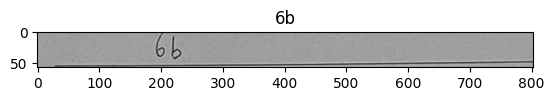

1/1 [==============================] - 1s 664ms/step


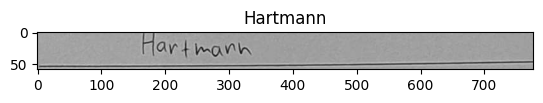

1/1 [==============================] - 1s 700ms/step


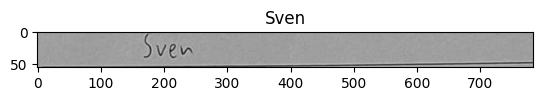

1/1 [==============================] - 1s 694ms/step


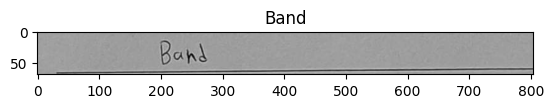

1/1 [==============================] - 1s 677ms/step


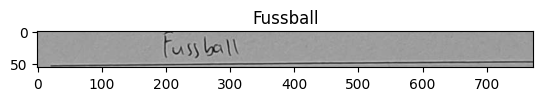

1/1 [==============================] - 1s 673ms/step


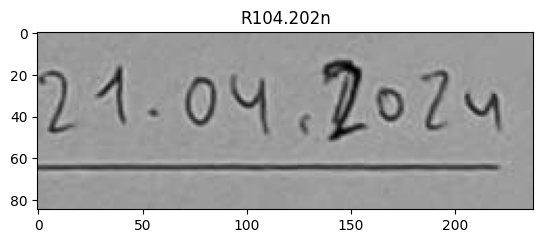

1/1 [==============================] - 1s 689ms/step


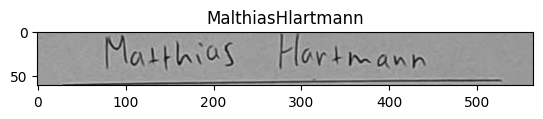

1/1 [==============================] - 1s 687ms/step


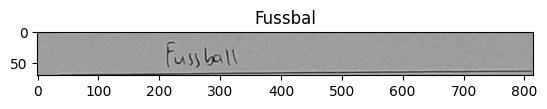

1/1 [==============================] - 1s 657ms/step


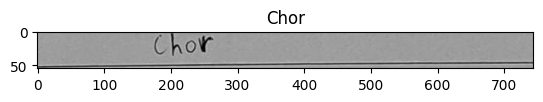

1/1 [==============================] - 1s 1s/step


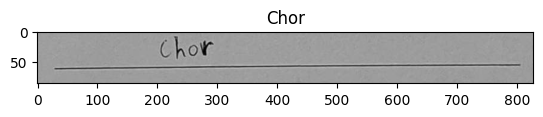

In [157]:
for img in crop_cropped_images:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_with_dim = np.expand_dims(gray, axis=2)
    title = handwriting_model.inference(gray_with_dim)
    image_rgb = cv2.cvtColor(gray_with_dim, cv2.COLOR_GRAY2RGB)
    plt.imshow(image_rgb)
    plt.title(title)
    plt.show()